In [1]:
import scipy.constants as cst
import numpy as np
import matplotlib.pyplot as plt
import Functions
import pandas as pd 
import isa

The HITRAN Database has two methods for absorption spectra, line by line spectra, which are used for Outgoing Longwave radiation and continuous cross sections, for shortwave radiation.

The main class contains the important data and the functions return 1D arrays with the datapoints and their respective wavenumbers in $cm^{-1}$. 
Further information about the data can be found at https://hitran.org/

A path to the datafiles should be made. 
The Gas With Cross section class, enables you to obtain the cross section for the different temperatures. On the Hitran website when this was made there were 6 different temperature datasets of O3.

In [2]:
T = 298 #K ##Temperature of the gas for the cross section 
mr = 48 #g/mol #Relative of the atomic mass for the species in question 
ppm = 0.08 # parts per million of the species

In [3]:
O3_continuum = Functions.gas_with_crossection('./Absorbtion Continua/Ozone Cross Sections/',mr,ppm)
O3 = Functions.gas('./Absorbtion Continua/O3.csv',mr,ppm)
O3_continuum.nu ##Produces a 1d dataframe of wavenumbers in cm^-1 
O3_continuum.corossection(T)### The cross section function finds the cross section for the species at the temperature closest to the input temperature
# This was for implementing the discrete step atmosphere. 
u = isa.getDensity(0)/1000*O3.pv/(O3.mr)*cst.N_A*10000*100 ##Molecules cm^{-2}

An example plot of the Absorption cross section. 

Text(0, 0.5, '$\\kappa_{\\nu}$ $(cm^2/molecule)$')

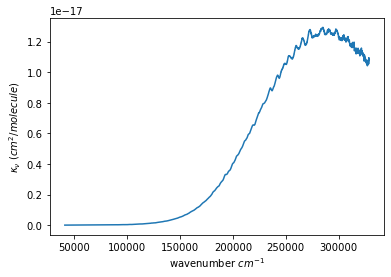

In [4]:
wavenumber = O3_continuum.nu
kappa = O3_continuum.corossection(298)
plt.plot(wavenumber,kappa)
plt.xlabel('wavenumber $cm^{-1}$')
plt.ylabel(r'$\kappa_{\nu}$ $(cm^2/molecule)$')    
            

Optical Transmission 
$$ I = I_0 exp(-\kappa_{\nu} \cdot u)$$
The main problem arises that for our uses the absorption of Ozone at the high weavenumbers is large, however the flux at these wavenumbers is negligible from the sun. 
Further irritatingly the Longwave HITRAN and HITMEP database doesn't include any values for the range between the two data sets.  

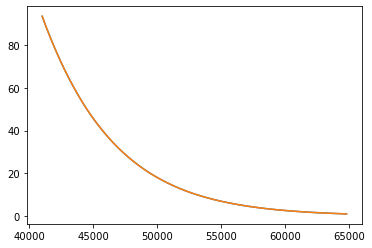

In [5]:
stop = 1000
Incoming_Flux  = Functions.plank_nu(O3_continuum.nu,5770,Flux= True)[:stop]
Flux = np.exp(-kappa[:stop]*u)*Incoming_Flux
plt.plot(O3_continuum.nu[:stop],Flux)
plt.plot(O3_continuum.nu[:stop],Flux)

Longwave section: 
Refer to The longwave tutorial Notebook for this. 


Text(0, 0.5, 'Spectral Flux Density $(mW \\cdot m^-2 \\cdot \\mu m^{-1})$')

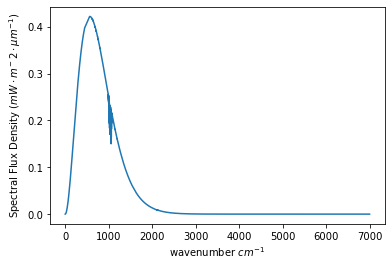

In [6]:
T_surf = 287
tau = Functions.lorentzain_fit(O3,0)
surface_flux = Functions.plank_nu(O3.nu,T_surf,Flux = True )
flux = surface_flux*np.exp(-tau*u)
plt.plot(O3.nu,flux)
plt.xlabel('wavenumber $cm^{-1}$')
plt.ylabel('Spectral Flux Density $(mW \cdot m^-2 \cdot \mu m^{-1})$' )
            